# 10 октября 2024. While-2. Организация циклических процессов (продолжение)

# w2.1. Примеры решения задач

### w2.1.1. Алгоритм Евклида для поиска НОД  (`gcd()`)

In [8]:
'''
NOD(10, 35)
I var  (из бОльшего вычитаем меньшее)

a   b  a != b
10  35   +
10  25   +
10  15   +
10   5   +
5    5   -
Критерий окончания: a == b
Ответ: или a, или b
'''

print()

In [11]:
# Пример w2.1.1 (НОД, 1 вариант).

a, b = 1000000, 35
cnt = 0  #  в алгоритм не входит. Счетчик итераций
while a != b:
    cnt += 1  #  в алгоритм не входит. Счетчик итераций
    if a > b:
        a = a - b
    else:
        b = b - a

print(a, cnt)

5 28575


In [11]:
'''
NOD(10, 35)
II var  (бОльшее % меньшее)

a    b  a*b != 0
10  35     +
10   5     +
0    5     -

Критерий окончания: a == 0 или b == 0 (a*b == 0)
Ответ: a + b
'''

print()

In [12]:
# Пример w2.1.2 (НОД, 2 вариант).

a, b = 1000000, 35
cnt = 0  #  в алгоритм не входит. Счетчик итераций
while a*b != 0:
    cnt += 1  #  в алгоритм не входит. Счетчик итераций    
    if a > b:
        a = a % b
    else:
        b = b % a

print(a + b, cnt)    

5 3


In [14]:
'''
NOD(10, 35)
III var  (бОльшее % меньшее. Но нет проверки на бОльшее)

Договоримся, что бОльшее всегда a
r  a   b    
   10 35
========
   35 10
-------- Как работает один шаг алгоритма
5  35 10   r = a % b
5  10 10   a = b
5  10  5   b = r
--------

Конкретный пример
r  a   b  b != 0  
   10 35
================
   35 10   +
----------------
5  10  5   +
0   5  0   -
--------
     
Критерий окончания: b == 0
Ответ: a
'''

print()

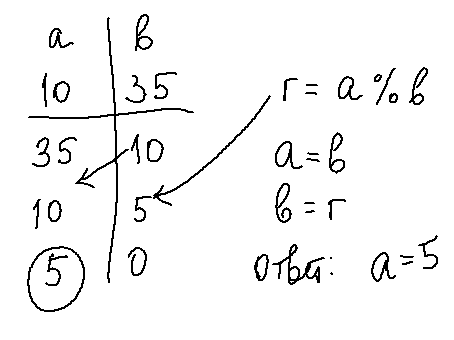

In [13]:
# Пример w2.1.3 (НОД, 3 вариант).

#a, b = 130, 350
a, b = 1000000, 35
cnt = 0  #  в алгоритм не входит. Счетчик итераций
if a < b:
    r = b
    b = a
    a = r
    
while b != 0:
    cnt += 1  #  в алгоритм не входит. Счетчик итераций
    r = a % b
    a = b
    b = r

print(a, cnt)

5 3


### w2.1.2. Действия над целыми числами

**Шаблон кода для работы с цифрами натурального числа**

----
```
n = int(input())  # исх. число

# ...             # инициализация пер-ных для решения задачи
m = n             # I: инициализация параметра цикла
while m > 0:      # II: проверка
    # ...         # операторы, решающие задачу
    m = m // 10   # III: модификация параметра цикла

# ... # печать ответа
```
----

**Для трёхзначного числа**
```
358 // 10 = 35 (1)
 35 // 10 = 3  (2)
  3 // 10 = 0  (3)
```

**Для четырёхзначного числа**
```
 4500 // 10 = 450 (1)
  450 // 10 = 45  (2)
   45 // 10 = 4   (3)
    4 // 10 = 0   (4)
```


**Пример w2.1.2 (количество цифр в натуральном числе).** Количество итераций цикла равно количеству цифр в числе.

In [14]:
n = int(input('n >>> ')) # исх. число

cnt = 0          # инициализация "кол-ва"
m = n            # I инициализация переменной, управляющей циклом. 
while m > 0:     # II
    cnt += 1
    m //= 10    # III

print('Кол. цифр числа %d равно %d' % (n, cnt))
print(f'Кол. цифр числа {n} равно {cnt}')

n >>>  12345678


Кол. цифр числа 12345678 равно 8
Кол. цифр числа 12345678 равно 8


**Пример w2.1.3 (сумма чётных цифр в целом числе).** 

In [6]:
n = int(input('n >>> ')) # исх. число

sm = 0           # инициализация "суммы"
m = abs(n)       # I инициализация переменной, управляющей циклом. 
while m > 0:     # II
    if m % 2 == 0:
        dig = m % 10   # цифра целого числа
        sm = sm + dig  # сумма цифр
    m = m // 10  # III

print('Сумма чётных цифр числа %d равна %d' % (n, sm))

n >>> -5687
Сумма чётных цифр числа -5687 равна 14


---
### w2.1.3. Использование сигнальной метки

**Пример w2.1.4.** Вычислить сумму всех экзаменационных оценок студента.


**Решение.** Количество экзаменов заранее неизвестно.

Ввод оценок осуществляется до тех пор, пока программа не получит информацию об окончании ввода.

**I способ (плохой в данном случае).**  Организовать запрос о необходимости продолжения ввода данных. Например,
```
Start (y - yes)? y
Mark = 4
Continue (y - yes)? y
Mark = 5
Continue (y - yes)? n
Sum = 9
```

Требуется введение дополнительной переменной 
```
s = 0                              # сумма баллов
c_ = input('Start (y - yes)? ')
while c_ == 'y':
    mark = int(input('Mark = '))   # экз. отметка
    s = s + mark
    c_ = input('Continue (y - yes)? ')

print('Sum = ', s)
```

In [5]:
# использование дополнительной переменной 
# ("пытка" пользователя доп. вопросами)
s = 0                          # сумма баллов
c_ = input('Start (y - yes)? ')
while c_ == 'y':
    mark = int(input('Mark >>> ')) # экз. отметка
    s = s + mark
    c_ = input('Continue (y - yes)? ')

print('Sum = ', s)

Start (y - yes)?  n


Sum =  0


----
**???** Как без дополнительных запросов прекратить считывание входных данных и закончить выполнение цикла?

**II способ (использование сигнальной метки)**. **Сигнальная метка** — уникальное значение
**входного данного**, сообщающего программе о наступлении определенного
события (об окончании обработки информации в нашем случае).

Условие продолжения цикла проверяет каждый введенный элемент данных и, в случае ввода сигнальной метки, инициирует выход из цикла. 

**Для сигнальной метки выбирается значение, не встречающееся среди
элементов данных.**

In [1]:
# использование сигнальной метки
s = 0
print('(Exit: -1)')  # среди оценок в дипломе не встречается оценка "-1"

mark = int(input('Mark >>> '))
while mark != -1:
    s = s + mark
    mark = int(input('Mark >>> '))

print('Sum = ', s)

(Exit: -1)
Mark >>> 90
Mark >>> 45
Mark >>> -1
Sum =  135


### Задание. Написать программу для решения задачи: 

вычислить средний балл экзаменационных оценок. 
Количество экзаменов заранее неизвестно.

Решение можно прислать лектору до вечера 13 октября.

**Пример w2.1.5 (Поиск максимального значения в последовательности целых чисел).** 
С клавиатуры вводятся целые числа из диапазона [100; 1000]. Количество чисел неизвестно.  Найти максимальное число.

*Математическая запись*: найти $\max a_i$, $a_i\in [100;1000]$, $i=1,2,\dots$

По условию **известно**, что числа вводятся из диапазона [100; 1000]. Это
позволяет выбрать значение сигнальной метки. Например, 0.

In [5]:
a = int(input('a >>> '))

mx = 99    # например. Главное -- выйти за наименьшую возможную для данной задачи границу
while a != 0:
    if a > mx:
        mx = a
    a = int(input('a >>> '))

if mx != 99:
    print('mx =', mx)
else:
    print('not')

a >>> 190
a >>> 0
mx = 190


**Пример w2.1.6 (Поиск максимального *нечётного* значения в последовательности целых чисел).** 
С клавиатуры вводится $n$ целых чисел. Найти максимальное нечётное число.

**Особенность**: количество вводимых чисел известно, а интервал вводимых значений
--- нет.

----
**I способ (использование для инициализации неподходящего по условию значения).**

**Инициализация максимума**:
значение, не подходящее под условие поиска. Например, 2 в нашем случае.

**После окончания работы цикла**: анализ значения максимума. Если он остался равен двум, то нечётных чисел в последовательности вводимых чисел не было.

In [3]:
n = int(input('n >>> '))  # ввод количества чисел

mx = 2         # т.к. 2 не подходит под условие поиска
i = 0          # I: параметра цикл = счётчик шагов
while i < n:   # II
    a = int(input('a >>> '))
    if a % 2 != 0 and (mx == 2 or a > mx):
        mx = a
    i += 1     # III

# Анализ результата работы программы и вывод ответа
if mx != 2:
    print('mx =', mx)
else:
    print('Нечётных чисел не было введено')

n >>>  3
a >>>  90
a >>>  80
a >>>  4


Нечётных чисел не было введено


----
**II способ (использование логической переменной).**

**Инициализация максимума:**  

- до цикла не требуется (если в условии гарантируется, что нечетные числа есть);
- произойдёт, когда встретится первое нечётное число.

**Использование логической переменной:**

- до цикла False, то есть максимум ещё не был инициализирован;
- в цикле True, когда встретится нечётное число.

**После окончания работы цикла:** анализ флага. Если он остался равен False, то нечётных чисел в последовательности вводимых чисел не было.

In [6]:
n = int(input('n >>> '))  # ввод количества чисел

yes = False        # максимум еще не был инициализирован
i = 0              # I
while i < n:       # II
    a = int(input('a >>> '))
    if a % 2 != 0 and (not yes or a > mx):
        yes = True
        mx = a
    i += 1         # III

# Анализ результата работы программы и вывод ответа
if yes:            # то есть yes == True, но так не пишем
    print('mx =', mx)
else:
    print('Нечётных чисел не было введено')

n >>>  3
a >>>  -67
a >>>  90
a >>>  -101


mx = -67


**Флаг** --- это логическая переменная, значение которой указывает,
произошло ли определенное событие.

**Работа с флагом:**
    
Значение флага должно быть первоначально установлено в False (или True),  
а затем изменено на True (или False) когда ожидаемое событие станет фактом 
(нарушится).

**Замечание.** В предыдущей программе флаг использовался, 
но он не управлял работой цикла!

### w2.1.4. Циклы, управляемые флагами

Флаг будет использоваться в заголовке цикла.

Цикл будет выполняться до тех пор, пока не наступит соответствующее событие.

In [7]:
# Продолжение в следующей части